# **Advanced Digital Signal Processing (ADSP) Lab - Python Lab Manual**
> **Course Code:** EEE G613 \
**IC:** Dr. Rajesh Kumar Tripathy \
**Research Scholar:** Shaswati Dash\
**Lab Technician:** Ramesh Pokanati





**********************************************
**********************************************

# **Experiment No. - 2**

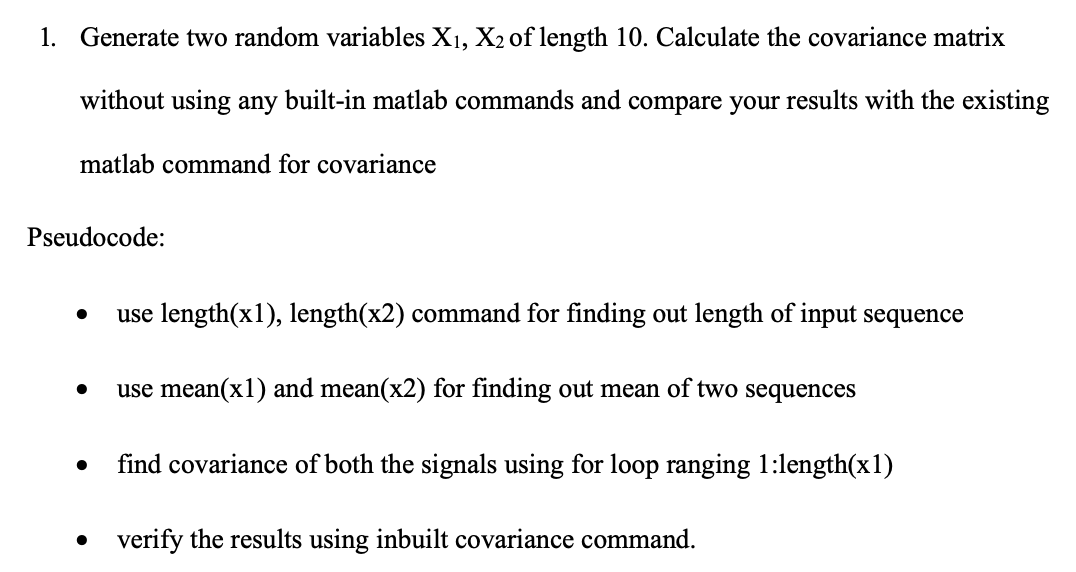



**********************************************
**********************************************

# *Python Code:*

In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X1 = np.random.rand(10) #random variable of length 10
X2 = np.random.rand(10) #random variable of length 10
len1 = len(X1) #length of X1
len2 = len(X2) #length of X2
avg1 = np.mean(X1)
avg2 = np.mean(X2)
S1 = X1-avg1
S2 = X2-avg2
C = np.vstack((S1, S2))
cov1 = np.dot(C, C.T) / (len1-1)
#
cov2 = np.cov(X1, X2)
print("Covariance Matrix w/o using built-in function:")
print(cov1)
print("Covariance matrix with using built-in function:")
print(cov2)

Covariance Matrix w/o using built-in function:
[[0.11225865 0.02051127]
 [0.02051127 0.10960856]]
Covariance matrix with using built-in function:
[[0.11225865 0.02051127]
 [0.02051127 0.10960856]]


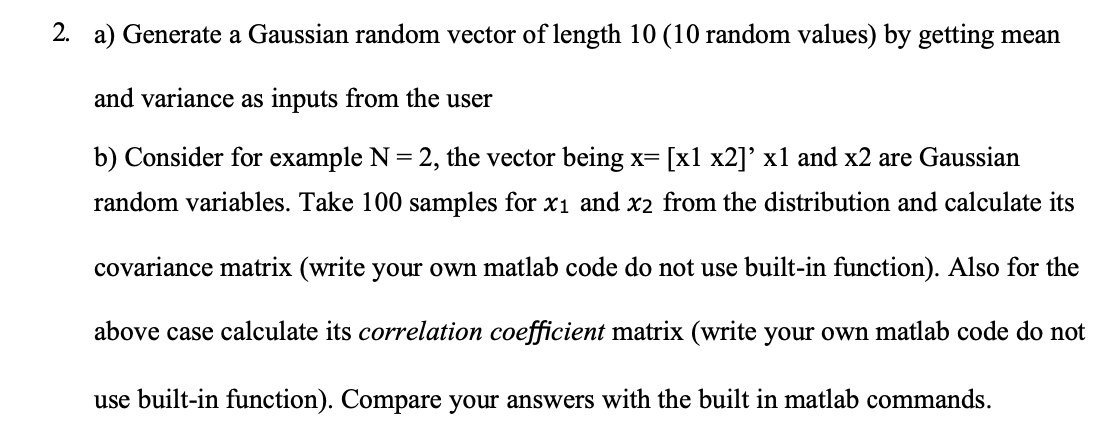

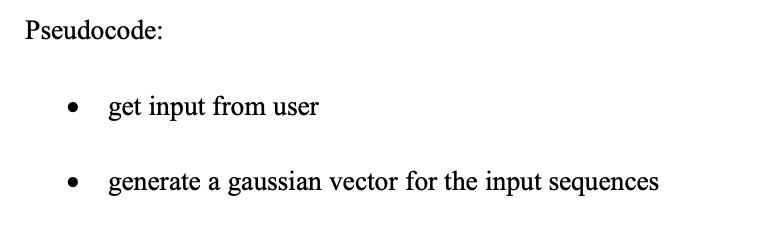

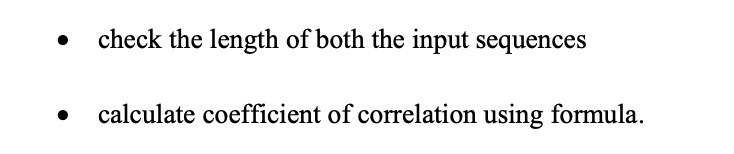

# *Python Code:*

In [3]:
#Q2-part(a)
#import libraries
import numpy as np
import time

In [4]:
start_time = time.time()

In [5]:
# Function to generate Gaussian random vector
def generate_gaussian_vector(length, user_mean, user_variance):
  # Generate Gaussian random vector with user-specified mean and variance
  gaussian_vector = np.random.normal(user_mean, np.sqrt(user_variance),length)
  return gaussian_vector

In [6]:
# Function to calculate covariance matrix
def calculate_covariance_matrix(data):
  mean_vector = np.mean(data, axis=0)
  centered_data = data - mean_vector
  covariance_matrix = np.dot(centered_data.T, centered_data) / (len(data) - 1)
  return covariance_matrix

In [7]:
# Function to calculate correlation coefficient matrix
def calculate_correlation_matrix(data):
  covariance_matrix = calculate_covariance_matrix(data)
  std_dev_vector = np.sqrt(np.diagonal(covariance_matrix))
  correlation_matrix = covariance_matrix / np.outer(std_dev_vector,std_dev_vector)
  return correlation_matrix

In [8]:
# User inputs for Gaussian random vector
length = 10
user_mean = float(input("Enter the mean for the Gaussian random vector: "))
user_variance = float(input("Enter the variance for the Gaussian random vector:"))

Enter the mean for the Gaussian random vector: 0
Enter the variance for the Gaussian random vector:2


In [9]:
# Generate Gaussian random vector
gaussian_vector = generate_gaussian_vector(length, user_mean, user_variance)
# Reshape vector for the case with N=2 (as in the example)
#The reshape function is used to change the shape of the Gaussian vector. In this case, it transforms
#the 1D vector into a 2D array with two columns
gaussian_vector_reshape = gaussian_vector.reshape((length // 2, 2))
# Calculate covariance matrix and correlation coefficient matrix manually
covariance_matrix_calculated = calculate_covariance_matrix(gaussian_vector_reshape)
correlation_matrix_calculated = calculate_correlation_matrix(gaussian_vector_reshape)
# Calculate covariance matrix and correlation coefficient matrix using NumPy's built-in functions
covariance_matrix_builtin = np.cov(gaussian_vector_reshape, rowvar=False)
correlation_matrix_builtin = np.corrcoef(gaussian_vector_reshape, rowvar=False)
# Compare and print the results
print("\nGenerated Gaussian Random Vector:\n", gaussian_vector)
print("\nCalculated Covariance Matrix (Manual):\n",covariance_matrix_calculated)
print("\nCalculated Covariance Matrix (NumPy's built-in):\n",covariance_matrix_builtin)
print("\nCalculated Correlation Coefficient Matrix (Manual):\n",correlation_matrix_calculated)
print("\nCalculated Correlation Coefficient Matrix (NumPy's built-in):\n",correlation_matrix_builtin)


Generated Gaussian Random Vector:
 [-0.42871321 -0.84039713  2.03138733 -0.70246475 -0.87990563 -0.7630045
  0.01732441 -0.48901208 -0.04391312 -1.19081116]

Calculated Covariance Matrix (Manual):
 [[1.24746466 0.05086375]
 [0.05086375 0.0654799 ]]

Calculated Covariance Matrix (NumPy's built-in):
 [[1.24746466 0.05086375]
 [0.05086375 0.0654799 ]]

Calculated Correlation Coefficient Matrix (Manual):
 [[1.         0.17796731]
 [0.17796731 1.        ]]

Calculated Correlation Coefficient Matrix (NumPy's built-in):
 [[1.         0.17796731]
 [0.17796731 1.        ]]


In [10]:
# Calculate errors
covariance_error = np.linalg.norm(covariance_matrix_calculated - covariance_matrix_builtin)
correlation_error = np.linalg.norm(correlation_matrix_calculated - correlation_matrix_builtin)
print(f"\nCovariance Matrix Error: {covariance_error}")
print(f"Correlation Coefficient Matrix Error: {correlation_error}")


Covariance Matrix Error: 0.0
Correlation Coefficient Matrix Error: 2.220446049250313e-16


In [11]:
# Calculate elapsed runtime
elapsed_time = time.time() - start_time
print(f"\nElapsed Runtime: {elapsed_time:.4f} seconds\n")


Elapsed Runtime: 24.5463 seconds



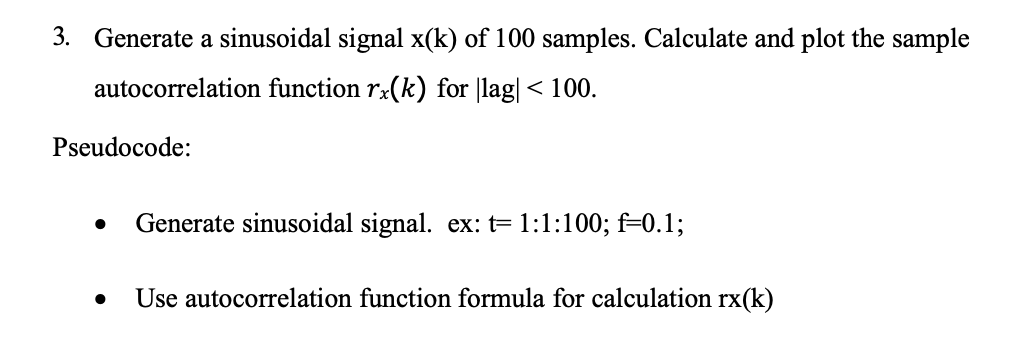

# *Python Code:*

In [12]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import time

In [13]:
start_time = time.time()

In [14]:
t = np.arange(1, 101, 1)
f = 0.1
y = np.sin(2 * np.pi * f * t)

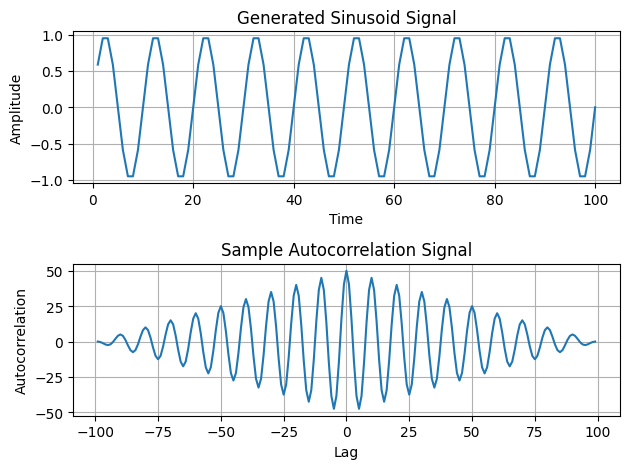


Elapsed Runtime: 0.6148 seconds



In [15]:
# Plot the generated sinusoid signal
plt.subplot(2, 1, 1)
plt.plot(t, y)
plt.title('Generated Sinusoid Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)

# Calculate and plot the sample autocorrelation signal
rxx, lags = np.correlate(y, y, mode='full'), np.arange(-len(y) + 1, len(y))
plt.subplot(2, 1, 2)
plt.plot(lags, rxx)
plt.title('Sample Autocorrelation Signal')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
# Adjust layout for better visualization
plt.tight_layout()
# Show the plots
plt.show()
# Calculate elapsed runtime
elapsed_time = time.time() - start_time
print(f"\nElapsed Runtime: {elapsed_time:.4f} seconds\n")